<h1 style="color:yellow" align="center">INSTALLATION AND IMPORTING <h1>

In [ ]:
!!pip install panda
!!pip install matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

<h2 style="color:yellow" align="center">THESE ARE OUR DATAFRAMES<h2>

In [49]:
df1=pd.read_csv("/Users/da_m1_52/Desktop/PANDA PROJECT/studentS.csv")
df2=pd.read_csv("/Users/da_m1_52/Desktop/PANDA PROJECT/books.csv")
pd.set_option('display.width', 1000)
df3=pd.read_csv("/Users/da_m1_52/Desktop/PANDA PROJECT/author.csv")
df4=pd.read_csv("/Users/da_m1_52/Desktop/PANDA PROJECT/borrow.csv")
df2=pd.read_csv("/Users/da_m1_52/Desktop/PANDA PROJECT/books.csv", delimiter=';')
pd.set_option('display.width', 1000)

<h3>DISPLAYING OUR DATAFRAMES<h3>

In [50]:

df1.head()

,studentId,name,surname,birthdate,gender,class,point
0,1,Hazel,Green,1999-05-15,F,9B,916
1,2,Ashley,Marshall,1999-10-28,F,12D,215
2,3,Ansley,Green,2000-07-12,F,12B,772
3,4,Alcock,Chapman,1999-01-25,F,10C,180
4,5,Meadow,Taylor,1999-12-30,F,11B,215


In [52]:
df2.head()


,bookId,name,pagecount,point,authorId,typeId
0,1,A Daughter of the Snows,199,84,3,9
1,2,The Near East: 10 000 Years of History,298,52,9,13
2,3,The Cocoon: A Rest-Cure Comedy,90,26,25,12
3,4,The Freakshow Murders,321,41,2,3
4,5,Pharaohs Fellahs and Explorers,367,56,19,9


In [37]:
df3.head()


,authorId,name,surname
0,1,William Dean,Howells
1,2,Frederic,Brown
2,3,Jack,London
3,4,Albert,Blaisdell
4,5,Ellis,Butler


In [38]:
df4.head()


,borrowId,studentId,bookId,takenDate,broughtDate,day_of_week
0,1,360,142,2015-08-09 13:26:00,2015-08-20 06:59:00,Thursday
1,2,308,131,2015-08-10 19:44:00,2015-08-15 10:46:00,Saturday
2,3,288,160,2015-08-10 22:05:00,2015-08-19 17:28:00,Wednesday
3,4,57,24,2015-08-11 02:32:00,2015-08-17 15:12:00,Monday
4,5,504,110,2015-08-12 12:05:00,2015-08-21 07:16:00,Friday


<h4>OUR ANALYTICAL QUESTIONS<h4>

QUESTION 1:
HOW MANY BOOKS DO WE HAVE?

In [53]:
record_count = df2.shape
print(record_count)

(168, 6)


QUESTION 2:
HOW MANY typeId's DO WE HAVE?

In [16]:
# Count the number of unique Type IDs
type_id_count = df2['typeId'].nunique()


# Count the occurrences of each Type ID
type_id_counts = df2['typeId'].value_counts().sort_index()

# Create a separate table to display the unique Type IDs
unique_type_ids = pd.DataFrame({'Type ID': type_id_counts.index})

# Print the result
print("Number of unique Type IDs:", type_id_count)
print("\nUnique Type IDs:\n")
print(unique_type_ids)


Number of unique Type IDs: 18

Unique Type IDs:

    Type ID
0         1
1         2
2         3
3         4
4         5
5         6
6         7
7         8
8         9
9        10
10       11
11       12
12       13
13       14
14       15
15       16
16       17
17       18


QUESTION 3:
WHICH TEN BOOKS HAVE BEEN TAKEN THE LEAST?

In [17]:
df2_sorted = df2.sort_values(by='point', ascending=True)[['name', 'point']]
print("Ten books that have been least taken? ")
print(df2_sorted.head(10))

Ten books that have been least taken? 
                                 name  point
149                The Caves of Steel     21
109                Manhattan Transfer     21
106  Heroic Deeds of American Sailors     21
77                      Indian Summer     21
150                          Carmilla     23
5                          Hard Times     25
62          The Cruise of the Dazzler     25
67                     The home-maker     25
83                       Th bent twig     26
2      The Cocoon: A Rest-Cure Comedy     26


QUESTION 4:
WHICH TEN BOOKS HAVE BEEN TAKEN THE MOST?

In [18]:

df2_sorted = df2.sort_values(by='point', ascending=False)[['name', 'point']]
print(df2_sorted.head(10))

                           name  point
135                   Poor Folk    101
64                   The Terror    101
121            Words in Genesis    101
87            Collected Stories    100
7         The Real Mother Goose     99
28           Maybe Mother Goose     98
101  In Exile and Other Stories     97
125                   The Idiot     97
70            Nicholas Nickleby     97
118               The Decameron     94


QUESTION 5:
IS THERE A RELATIONSHIP BETWEEN PAGE COUNT AND POINT?

In [27]:
correlation = df2['pagecount'].corr(df2['point'])
rounded_correlation = round(correlation, 4)
print("Correlation between page count and point:", rounded_correlation)


Correlation between page count and point: 0.0591


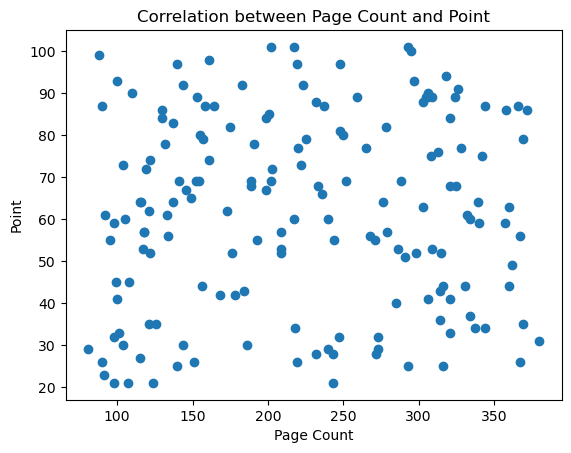

In [54]:
# Plotting the scatter plot
plt.scatter(df2['pagecount'], df2['point'])
plt.xlabel('Page Count')
plt.ylabel('Point')
plt.title('Correlation between Page Count and Point')
plt.show()


QUESTION 6:
IS THERE A RELATIONSHIP BETWEEN typeId AND point?

In [41]:
correlation = df2['point'].corr(df2['typeId'])
rounded_correlation = round(correlation, 4)
print("Correlation between TypeId and point:", rounded_correlation)

Correlation between TypeId and point: 0.0372


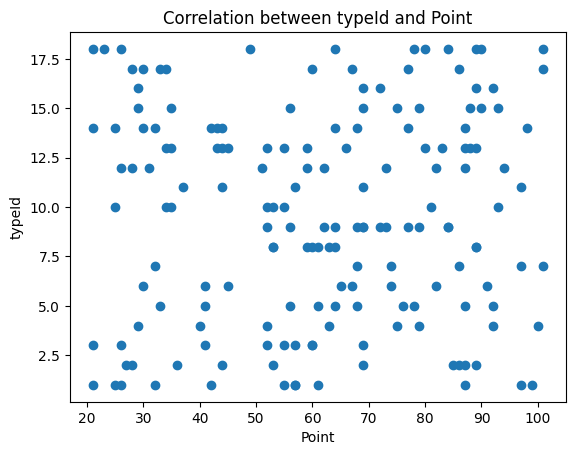

In [15]:
# Plotting the scatter plot
plt.scatter(df2['point'], df2['typeId'])
plt.xlabel('Point')
plt.ylabel('typeId')
plt.title('Correlation between typeId and Point')
plt.show()

QUESTION 7:
WHICH typeId HAS THE MOST POINTS AND WHICH ONE HAS THE LEAST POINTS?

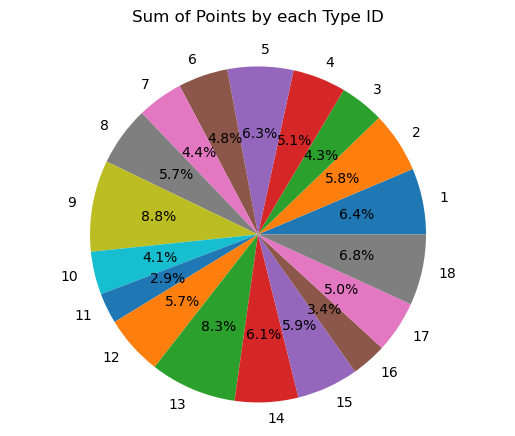

In [20]:
grouped_df = df2.groupby('typeId')['point'].sum().reset_index()

# Create the pie chart and subplot
fig, ax = plt.subplots()

# Set the title
ax.set_title('Sum of Points by each Type ID', pad=20)  # Adjust the 'pad' value to increase or decrease the space

# Plot the pie chart
ax.pie(grouped_df['point'], labels=grouped_df['typeId'], autopct='%1.1f%%')

# Set the aspect ratio to 'equal'
ax.axis('equal')

# Display the chart
plt.show()

QUESTION 8: LOOKING FOR SUM OF POINT BY ID?

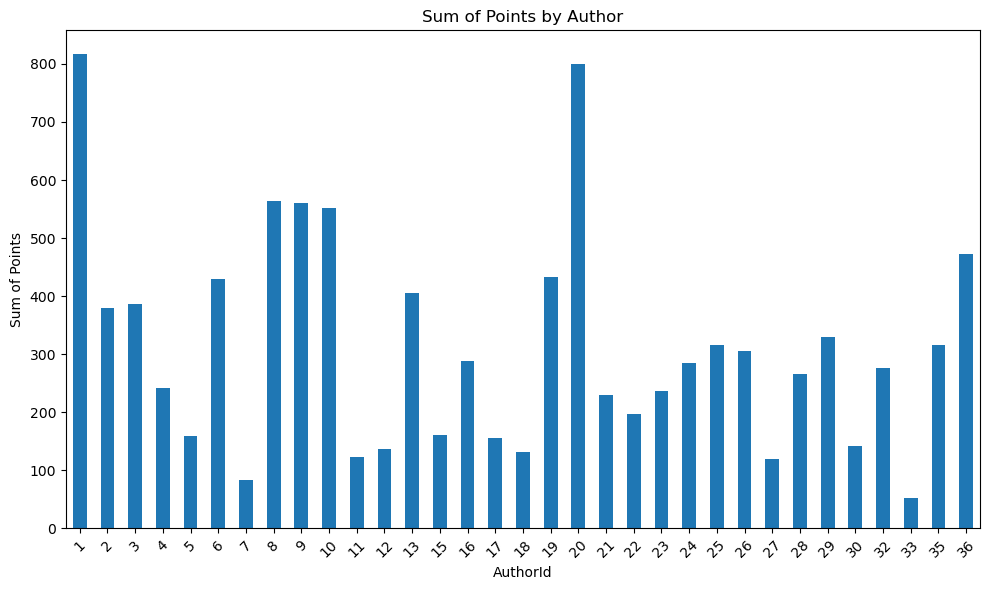

In [40]:


# Merge the dataframes on 'authorid'
merged_data = pd.merge(df2, df3, on='authorId')

# Calculate the sum of points by author
sum_points = merged_data.groupby('authorId')['point'].sum().round(2)

# Create a bar plot
plt.figure(figsize=(10, 6))
sum_points.plot(kind='bar')
plt.xlabel('AuthorId')
plt.ylabel('Sum of Points')
plt.title('Sum of Points by Author')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the bar plot
plt.show()


In [43]:
# Define the author IDs you want to filter
author_ids = [1, 7, 20, 33]

# Filter df3 based on the specified author IDs
filtered_df = df3[df3['authorId'].isin(author_ids)]

# Display the filtered DataFrame
filtered_df.head()


,authorId,name,surname
0,1,William Dean,Howells
6,7,Titus,Lucretius
19,20,Fyodor,Dostoevsky
32,33,Kate Dickinson,Sweetser


QUESTION 9:
WHAT ARE THE DAYS OF THE WEEK WHERE MOST BOOKS WERE BROUGHT BACK?

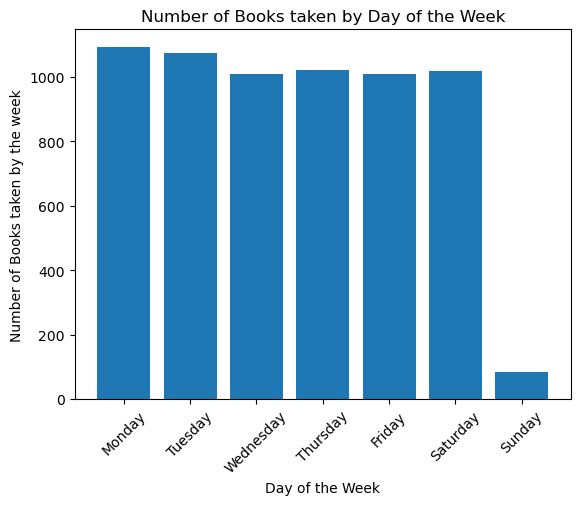

In [21]:
# Convert 'TakenDate' column to datetime format
df4['takenDate'] = pd.to_datetime(df4['takenDate'])

# Extract the day of the week from the 'TakenDate' column
df4['day_of_week'] = df4['takenDate'].dt.day_name()

# Count the number of books brought back for each day of the week
book_counts_by_day = df4['day_of_week'].value_counts().sort_index()

# Define the desired order of days of the week
desired_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex the book_counts_by_day DataFrame to match the desired order
book_counts_by_day = book_counts_by_day.reindex(desired_order)

# Create a bar plot
plt.bar(book_counts_by_day.index, book_counts_by_day.values)

# Set labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Books taken by the week')
plt.title('Number of Books taken by Day of the Week')

plt.xticks(rotation=45)
# Display the plot
plt.show()



QUESTION 10: WHAT ARE THE DAYS OF THE WEEK WHERE MOST BOOKS WERE BROUGHT BACK?

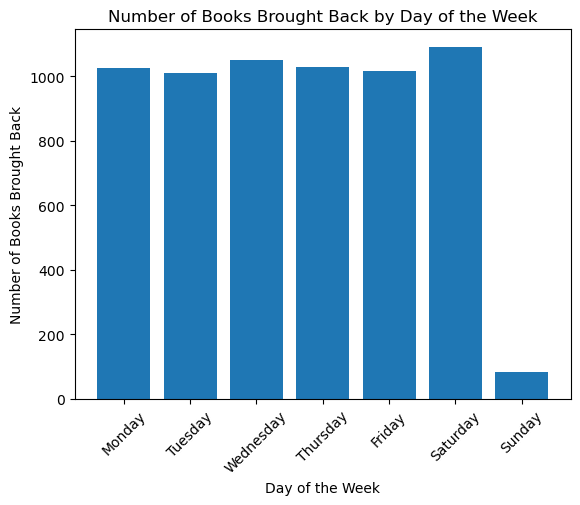

In [22]:
# Convert 'broughtDate' column to datetime format
df4['broughtDate'] = pd.to_datetime(df4['broughtDate'])

# Extract the day of the week from the 'broughtDate' column
df4['day_of_week'] = df4['broughtDate'].dt.day_name()

# Count the number of books brought back for each day of the week
book_counts_by_day = df4['day_of_week'].value_counts().sort_index()

# Define the desired order of days of the week
desired_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex the book_counts_by_day DataFrame to match the desired order
book_counts_by_day = book_counts_by_day.reindex(desired_order)

# Create a bar plot
plt.bar(book_counts_by_day.index, book_counts_by_day.values)

# Set labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Books Brought Back')
plt.title('Number of Books Brought Back by Day of the Week')

plt.xticks(rotation=45)
# Display the plot
plt.show()


QUESTION 11:
THE NUMBER OF TIMES THAT A BOOK HAS BEEN TAKEN IN THE YEAR 2015,2016 AND 2017?

In [23]:
# Convert the 'takenDate' column to datetime
df4['takenDate'] = pd.to_datetime(df4['takenDate'])

# Filter the DataFrame for the years 2015, 2016, and 2017
total_books_borrowed_2015_2017 = df4[(df4['takenDate'].dt.year >= 2015) & (df4['takenDate'].dt.year <= 2017)]

# Convert the x-axis values to strings with the year and month part
x_values = total_books_borrowed_2015_2017['takenDate'].dt.strftime('%Y-%b')
# Count the number of books borrowed in each year
book_counts_0 = total_books_borrowed_2015_2017['takenDate'].dt.year.value_counts().sort_index()

# Print the book counts
print(book_counts_0)


2015    1322
2016    3783
2017    1203
Name: takenDate, dtype: int64


QUESTION 12:
THE NUMBER OF TIMES THAT A BOOK HAS BEEN BROUGHT BACK IN THE YEAR 2015,2016 AND 2017?

In [80]:
# Convert the 'takenDate' column to datetime
df4['broughtDate'] = pd.to_datetime(df4['broughtDate'])

# Filter the DataFrame for the years 2015, 2016, and 2017
total_books_brought_2015_2017 = df4[(df4['broughtDate'].dt.year >= 2015) & (df4['broughtDate'].dt.year <= 2017)]

# Convert the x-axis values to strings with the year and month part
x_values = total_books_brought_2015_2017['broughtDate'].dt.strftime('%Y-%b')

# Calculate the book counts
book_counts_1 = total_books_brought_2015_2017['broughtDate'].dt.year.value_counts().sort_index()

# Print the book counts
print(book_counts_1)



broughtDate
2015    1176
2016    3794
2017    1338
Name: count, dtype: int64


QUESTION 13:
HOW MANY UNIQUE BORROWS ARE THERE IN THE DATASET?

In [56]:
unique_borrowers_count = df4['studentId'].nunique()
print("Number of unique borrowers:", unique_borrowers_count)

Number of unique borrowers: 504


QUESTION 14:
WHICH CLASS HAS THE HIGHEST RATINGS?

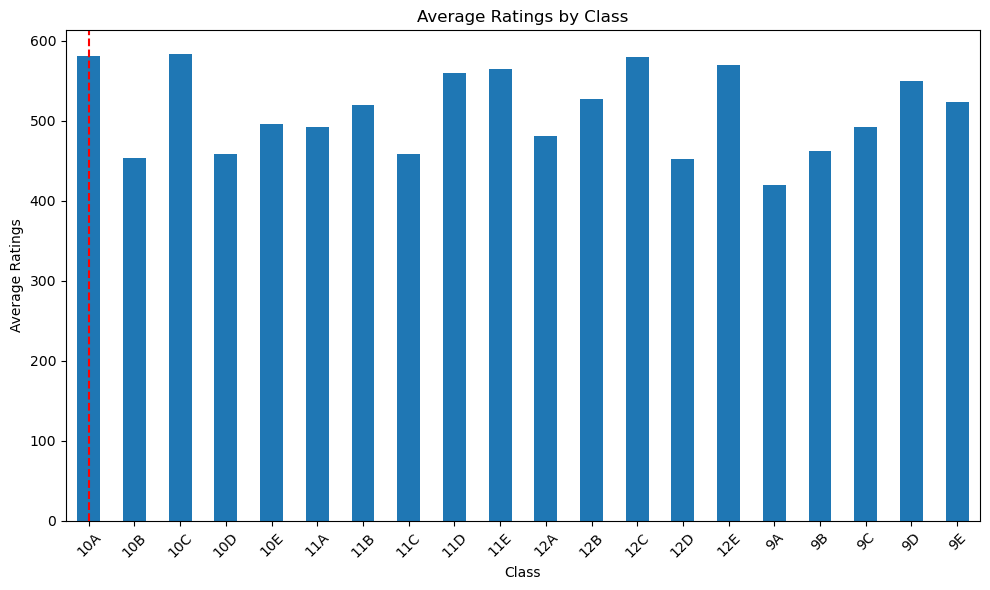

In [55]:
# Group by class and calculate average ratings
average_ratings = df1.groupby('class')['point'].mean()

# Find the class with the highest average ratings
highest_ratings_class = average_ratings.idxmax()

# Create a bar graph
plt.figure(figsize=(10, 6))
average_ratings.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Average Ratings')
plt.title('Average Ratings by Class')
plt.xticks(rotation=45)
plt.tight_layout()

# Highlight the class with the highest ratings
plt.axvline(x=highest_ratings_class, color='red', linestyle='--')

# Display the bar graph
plt.show()

QUESTION 15:
WHAT IS THE MEDIAN AGE OF THE READERS?


In [47]:
df1['birthdate'] = pd.to_datetime(df1['birthdate'])

current_date = pd.to_datetime('today').normalize()
df1['age'] = (current_date - df1['birthdate']).dt.days // 365

median_age = df1['age'].median()

print("Median age of the readers:", median_age)

Median age of the readers: 23.0



QUESTION 16:WHAT IS THE MEDIAN AGE OF THE READERS?

In [48]:
class_sums = df1.groupby('class')['point'].sum().reset_index(name='sum_points')
class_sums = class_sums.sort_values('sum_points', ascending=False)
print(class_sums)

   class  sum_points
7    11C       16965
12   12C       16250
19    9E       15719
14   12E       15371
9    11E       15252
18    9D       14826
11   12B       14220
8    11D       14003
0    10A       13361
17    9C       13284
3    10D       13281
4    10E       12909
13   12D       12660
6    11B       12487
16    9B       11102
2    10C       10510
1    10B        9510
10   12A        9139
5    11A        8852
15    9A        8389
